In [ ]:
!pip install openpyxl


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import numpy as np
import rasterio


In [ ]:
# Load the CSV files containing labels for the years 2022 and 2023
labels_path_2022 = '2022/2022/DataPublication_final/GroundTruth/HYBRID_HIPS_V3.5_ALLPLOTS.csv'
labels_path_2023 = '2023/2023/DataPublication_final/GroundTruth/train_HIPS_HYBRIDS_2023_V2.3.csv'

# Read the CSV files into DataFrames
labels_df_2022 = pd.read_csv(labels_path_2022)
labels_df_2023 = pd.read_csv(labels_path_2023)

# Display the first few rows of the 2022 data
print("Datos de 2022:")
print(labels_df_2022.head())

# Display the first few rows of the 2023 data
print("\nDatos de 2023:")
print(labels_df_2023.head())

Datos de 2022:
   index qrCode location  irrigationProvided nitrogenTreatment  \
0      8    NaN     Ames                 NaN               NaN   
1     11    NaN     Ames                 NaN               NaN   
2      0    NaN     Ames                 NaN               NaN   
3      9    NaN     Ames                 NaN               NaN   
4     12    NaN     Ames                 NaN               NaN   

   poundsOfNitrogenPerAcre experiment  plotLength  block  row  range  \
0                        0       4231         NaN    NaN    2     23   
1                        0       4231         NaN    NaN    2     31   
2                        0       4231         NaN    NaN    3      4   
3                        0       4231         NaN    NaN    3     29   
4                        0       4231         NaN    NaN    3     31   

   plotNumber genotype plantingDate  totalStandCount  daysToAnthesis  \
0         NaN      NaN          NaN              NaN             NaN   
1         N

In [ ]:
# Display the column names for the 2022 dataset
print("Descripción de las columnas de 2022:")
print(labels_df_2022.columns)

# Display the column names for the 2023 dataset
print("\nDescripción de las columnas de 2023:")
print(labels_df_2023.columns)


Descripción de las columnas de 2022:
Index(['index', 'qrCode', 'location', 'irrigationProvided',
       'nitrogenTreatment', 'poundsOfNitrogenPerAcre', 'experiment',
       'plotLength', 'block', 'row', 'range', 'plotNumber', 'genotype',
       'plantingDate', 'totalStandCount', 'daysToAnthesis', 'GDDToAnthesis',
       'yieldPerAcre'],
      dtype='object')

Descripción de las columnas de 2023:
Index(['qrCode', 'location', 'irrigationProvided', 'nitrogenTreatment',
       'poundsOfNitrogenPerAcre', 'experiment', 'plotLength', 'block', 'row',
       'range', 'plotNumber', 'genotype', 'plantingDate', 'totalStandCount',
       'daysToAnthesis', 'GDDToAnthesis', 'yieldPerAcre'],
      dtype='object')


In [ ]:
# Descriptive statistics for the 'yieldPerAcre' column in the 2022 dataset
print("2022 Descriptive Statistics (yieldPerAcre):")
print(labels_df_2022['yieldPerAcre'].describe())

# Descriptive statistics for the 'yieldPerAcre' column in the 2023 dataset
print("\n2023 Descriptive Statistics (yieldPerAcre):")
print(labels_df_2023['yieldPerAcre'].describe())

Estadísticas descriptivas de 2022 (yieldPerAcre):
count    2131.000000
mean      121.902285
std        54.682454
min         1.670000
25%        82.110000
50%       136.450000
75%       162.935000
max       243.930000
Name: yieldPerAcre, dtype: float64

Estadísticas descriptivas de 2023 (yieldPerAcre):
count    643.000000
mean     118.311384
std       49.667581
min       21.670000
25%       88.060000
50%      107.940000
75%      136.840000
max      278.460000
Name: yieldPerAcre, dtype: float64


In [ ]:
# Filter out rows with missing values in 'yieldPerAcre' for both years
labels_df_clean_2022 = labels_df_2022.dropna(subset=['yieldPerAcre'])
labels_df_clean_2023 = labels_df_2023.dropna(subset=['yieldPerAcre'])

print(f"Valid entries in 2022 after filtering: {len(labels_df_clean_2022)}")
print(f"Valid entries in 2023 after filtering: {len(labels_df_clean_2023)}")


Entradas válidas en 2022 después de filtrar: 2131
Entradas válidas en 2023 después de filtrar: 643


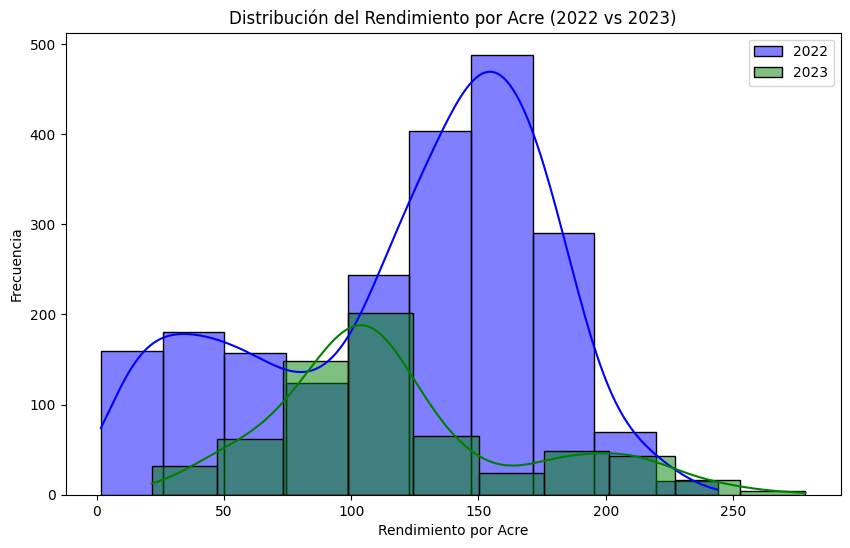

In [ ]:
# Yield per acre distribution for 2022 and 2023
plt.figure(figsize=(10, 6))
sns.histplot(labels_df_clean_2022['yieldPerAcre'], kde=True, bins=10, color='blue', label='2022', alpha=0.5)
sns.histplot(labels_df_clean_2023['yieldPerAcre'], kde=True, bins=10, color='green', label='2023', alpha=0.5)
plt.title('Distribución del Rendimiento por Acre (2022 vs 2023)')
plt.xlabel('Rendimiento por Acre')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


Detalles de la parcela:

index                                                   1320
qrCode                     6109$ROW29$RANGE3$LH195 X LH123HT
location                                             Lincoln
irrigationProvided                                       0.0
nitrogenTreatment                                       High
poundsOfNitrogenPerAcre                                  225
experiment                                           hybrids
plotLength                                              17.5
block                                                    5.0
row                                                       29
range                                                      3
plotNumber                                            6109.0
genotype                                     LH195 X LH123HT
plantingDate                                      2022-05-22
totalStandCount                                          NaN
daysToAnthesis                                          64.0

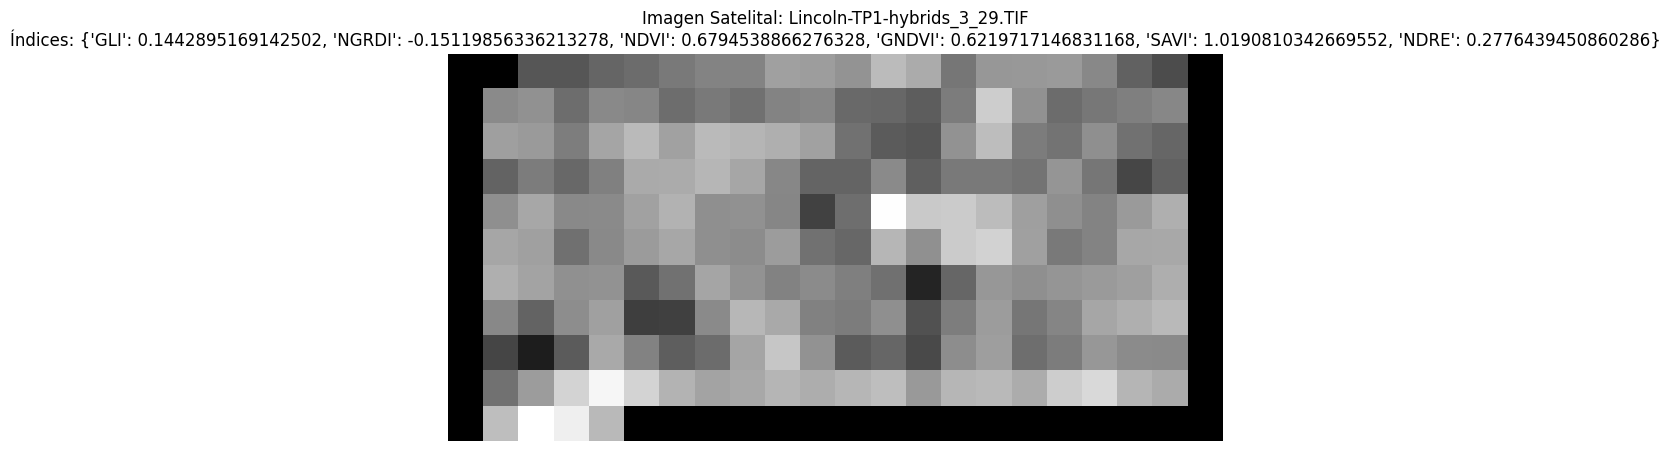

Imagen satelital: Lincoln-TP2-hybrids_3_29.TIF
Índices calculados: {'GLI': 0.051468292982588724, 'NGRDI': -0.019085709703528256, 'NDVI': 0.5360087383087415, 'GNDVI': 0.5259730549291334, 'SAVI': 0.8039109859951113, 'NDRE': 0.2406162838203744}



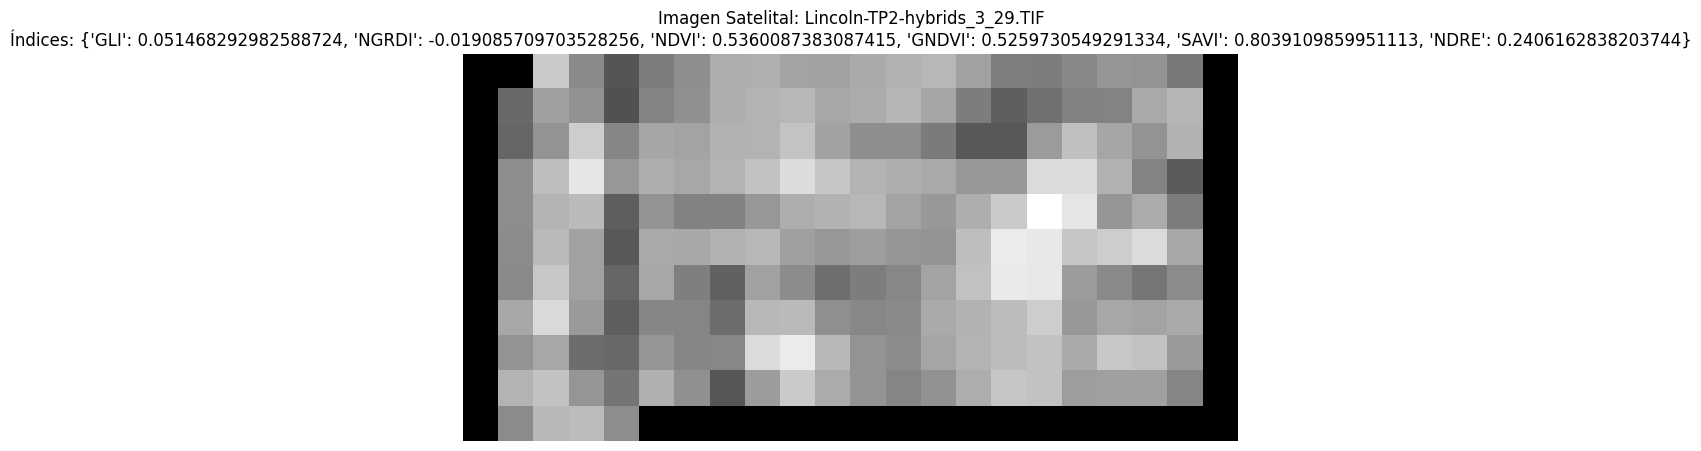

Imagen satelital: Lincoln-TP3-hybrids_3_29.TIF
Índices calculados: {'GLI': 0.029443061276005364, 'NGRDI': 0.066194546931159, 'NDVI': 0.4307583549795608, 'GNDVI': 0.47800214384549816, 'SAVI': 0.6460489075741105, 'NDRE': 0.15123546411211558}



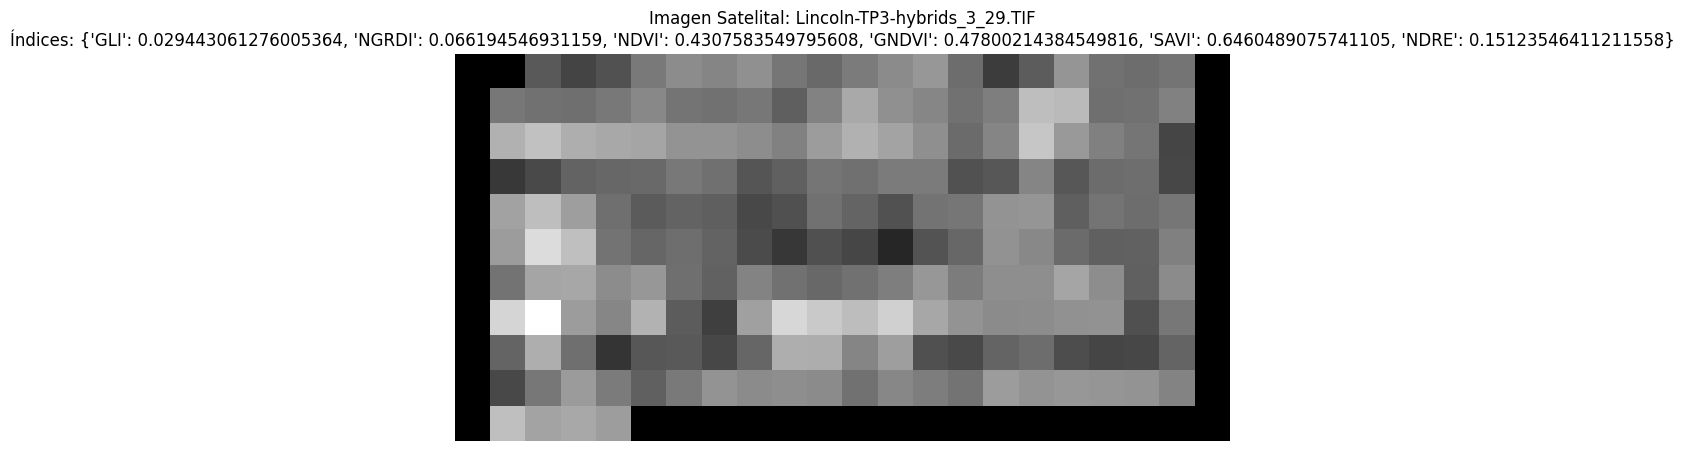

Imagen satelital: Lincoln-TP4-hybrids_3_29.TIF
Índices calculados: {'GLI': 0.026868145219017477, 'NGRDI': 0.05548309566151103, 'NDVI': 0.4231011127313735, 'GNDVI': 0.4638147599179171, 'SAVI': 0.6345666967365873, 'NDRE': 0.13972380471130413}



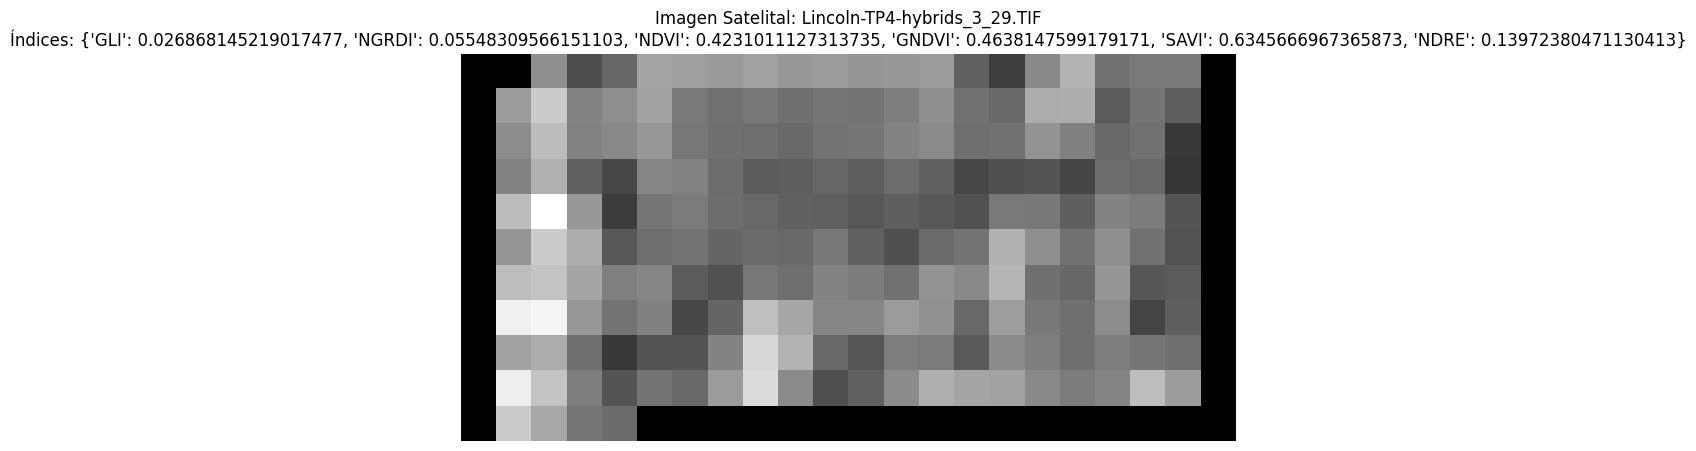

Imagen satelital: Lincoln-TP5-hybrids_3_29.TIF
Índices calculados: {'GLI': 0.039311435404165825, 'NGRDI': 0.026469224011144606, 'NDVI': 0.4195535586022251, 'GNDVI': 0.4401096592598621, 'SAVI': 0.6292137322932454, 'NDRE': 0.16027318364997287}



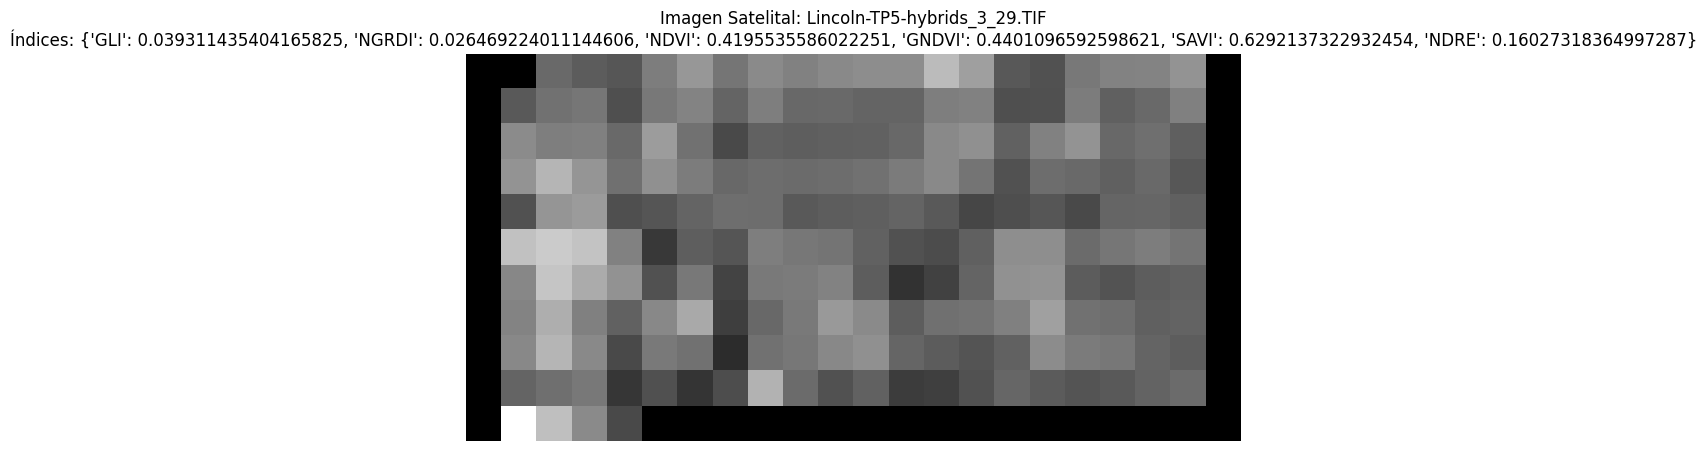

Imagen satelital: Lincoln-TP6-hybrids_3_29.TIF
Índices calculados: {'GLI': 0.022547061305677216, 'NGRDI': 0.049108394699870016, 'NDVI': 0.399901394300525, 'GNDVI': 0.4373280442205827, 'SAVI': 0.5997384469041142, 'NDRE': 0.14717359372916847}



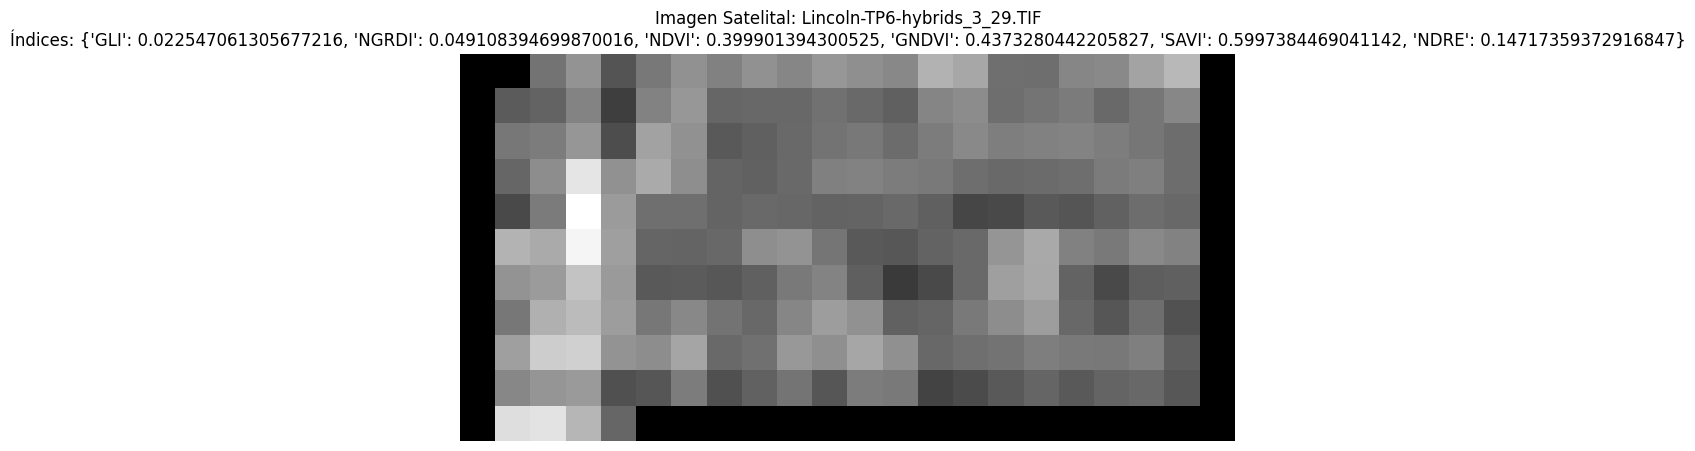

Imagen UAV: Lincoln-TP1-hybrids_3_29.PNG
Índices calculados: {'GLI': 0.16269633678940243, 'NGRDI': -0.12892858636957266}



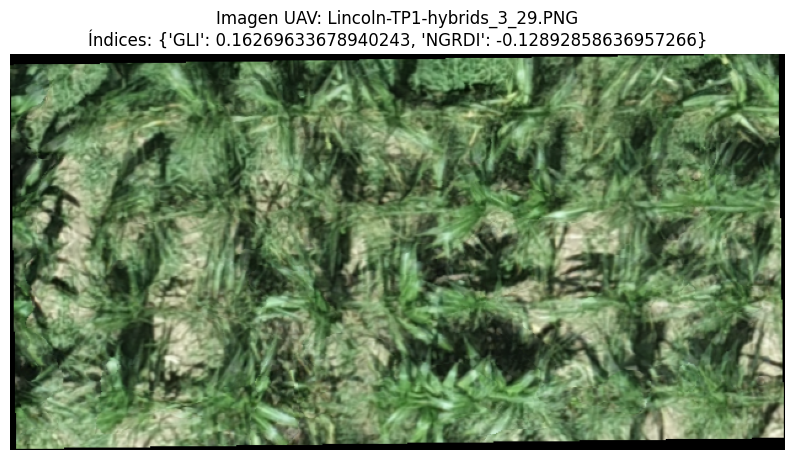

Imagen UAV: Lincoln-TP2-hybrids_3_29.PNG
Índices calculados: {'GLI': 0.1268774610189579, 'NGRDI': -0.08426998006294183}



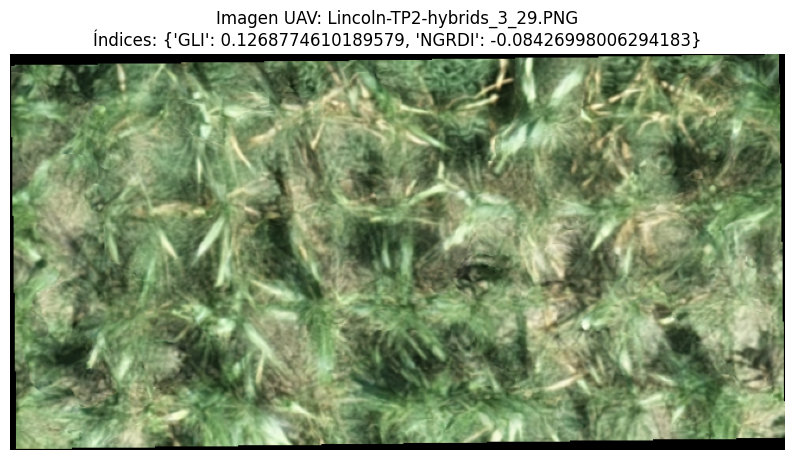

Imagen UAV: Lincoln-TP3-hybrids_3_29.PNG
Índices calculados: {'GLI': 0.12179854135909325, 'NGRDI': -0.07189575951684349}



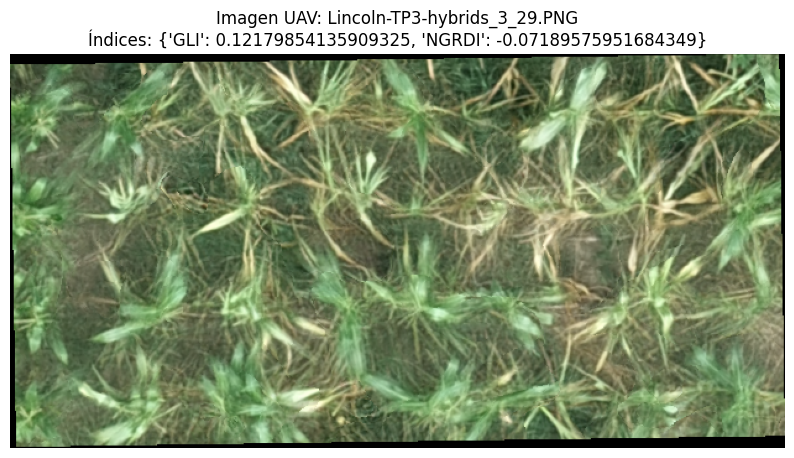

In [ ]:
# Function to load and display the satellite image with calculated indices
def show_satellite_image_with_indices(image_path, indices):
    image_data = load_tif_image(image_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(image_data[0], cmap='gray')
    plt.title(f"Satellite Image: {os.path.basename(image_path)}\nÍndices: {indices}")
    plt.axis('off')
    plt.show()

# Function to load and display the UAV image with calculated indices
def show_uav_image_with_indices(image_path, indices):
    image_data = load_uav_image(image_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(image_data)
    plt.title(f"UAV Image: {os.path.basename(image_path)}\nÍndices: {indices}")
    plt.axis('off')
    plt.show()

# Example usage: Display images and their indices for a selected row
def show_images_and_indices(row_number, labels_df, satellite_paths, uav_paths):
    plot_data = labels_df.iloc[row_number]
    location = plot_data['location']
    row = plot_data['row']
    range_no = plot_data['range']
    experiment = plot_data['experiment']

    print(f"Plot details:\n")
    print(plot_data.to_string(index=True))

    print(f"\Available images for plot  {location}, rango {range_no}, fila {row}:\n")

     # Find and display satellite images
    for path in satellite_paths:
        if location in path and f"{experiment}_{range_no}_{row}" in path:
            indices = calculate_satellite_indices(load_tif_image(path))
            print(f"Satellite image:  {os.path.basename(path)}")
            print(f"Calculated indices: {indices}\n")
            show_satellite_image_with_indices(path, indices)

    # Find and display UAV images
    for path in uav_paths:
        if location in path and f"{experiment}_{range_no}_{row}" in path:
            indices = calculate_rgb_indices(load_uav_image(path))
            print(f"UAV image: {os.path.basename(path)}")
            print(f"Calculated indices: {indices}\n")
            show_uav_image_with_indices(path, indices)

# Call the function to display images and their indices
show_images_and_indices(row_number, labels_df_2022, satellite_paths, uav_paths)



In [ ]:
!pip install openpyxl


   ---------------------------------------- 0.0/250.9 kB ? eta -:--:--
   ------ -------------------------------- 41.0/250.9 kB 991.0 kB/s eta 0:00:01
   ------------------------ --------------- 153.6/250.9 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 250.9/250.9 kB 2.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Detalles de la parcela:

qrCode                     LINCOLN$HYBRID HIPS$75N$DRYLAND$REP$1$PLOT5039...
location                                                             Lincoln
irrigationProvided                                                         0
nitrogenTreatment                                                        Low
poundsOfNitrogenPerAcre                                                   75
experiment                                                                75
plotLength                                                              17.5
block                                                                      1
row                                                                       15
range                                                                     14
plotNumber                                                              5039
genotype                                                        2369 X PHN82
plantingDate                                       

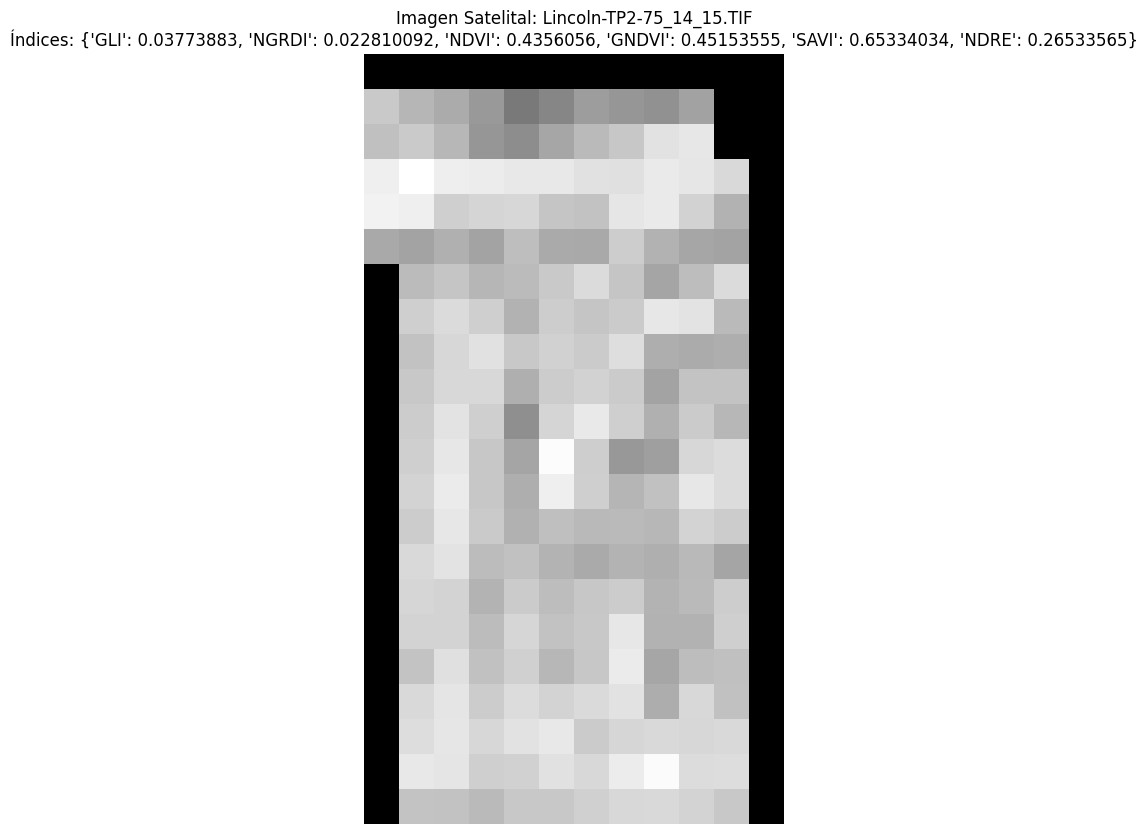

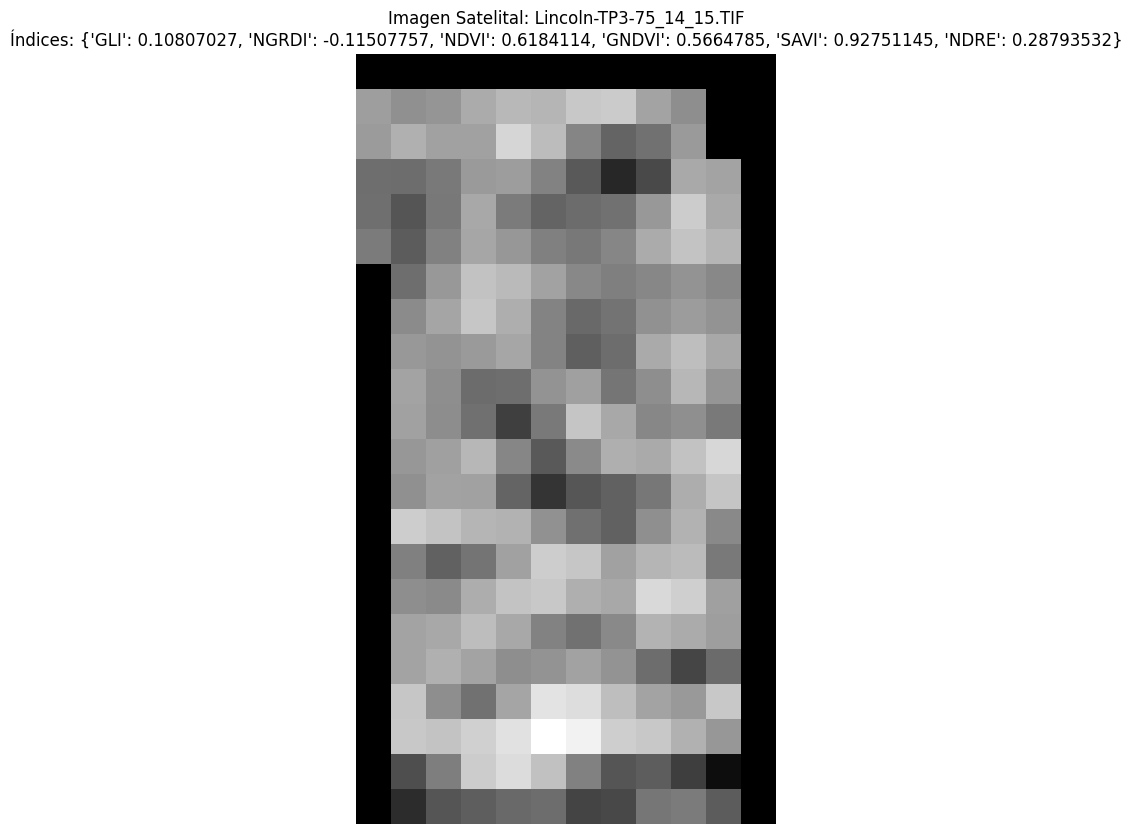

In [ ]:

# Cargar los datos de rendimiento 2023
labels_df_2023 = pd.read_csv('2023/2023/DataPublication_final/GroundTruth/train_HIPS_HYBRIDS_2023_V2.3.csv')

# Definir la función para cargar imágenes .TIF (satélite)
def load_tif_image(image_path):
    with rasterio.open(image_path) as src:
        return src.read()

# Función para calcular índices en imágenes satelitales con manejo de valores indefinidos
def calculate_satellite_indices(image_data):
    bands = {}
    bands['Red'] = image_data[2].astype(np.float32)
    bands['Green'] = image_data[1].astype(np.float32)
    bands['Blue'] = image_data[0].astype(np.float32)
    bands['Nir'] = image_data[3].astype(np.float32)
    bands['RedEdge'] = image_data[4].astype(np.float32)
    bands['DeepBlue'] = image_data[5].astype(np.float32)

    indices = {}
    indices['GLI'] = np.divide((2 * bands['Green'] - bands['Red'] - bands['Blue']), (2 * bands['Green'] + bands['Red'] + bands['Blue']), out=np.zeros_like(bands['Green']), where=(2 * bands['Green'] + bands['Red'] + bands['Blue'])!=0)
    indices['NGRDI'] = np.divide((bands['Red'] - bands['Green']), (bands['Red'] + bands['Green']), out=np.zeros_like(bands['Green']), where=(bands['Red'] + bands['Green'])!=0)
    indices['NDVI'] = np.divide((bands['Nir'] - bands['Red']), (bands['Nir'] + bands['Red']), out=np.zeros_like(bands['Red']), where=(bands['Nir'] + bands['Red'])!=0)
    indices['GNDVI'] = np.divide((bands['Nir'] - bands['Green']), (bands['Nir'] + bands['Green']), out=np.zeros_like(bands['Green']), where=(bands['Nir'] + bands['Green'])!=0)
    indices['SAVI'] = 1.5 * np.divide((bands['Nir'] - bands['Red']), (bands['Nir'] + bands['Red'] + 0.5), out=np.zeros_like(bands['Red']), where=(bands['Nir'] + bands['Red'] + 0.5)!=0)
    indices['NDRE'] = np.divide((bands['Nir'] - bands['RedEdge']), (bands['Nir'] + bands['RedEdge']), out=np.zeros_like(bands['RedEdge']), where=(bands['Nir'] + bands['RedEdge'])!=0)

    # Calcula los valores medios de cada índice
    mean_indices = {k: np.nanmean(v) for k, v in indices.items()}

    return mean_indices

# Función para mostrar la imagen satelital con los índices
def show_satellite_image_with_indices(image_path, indices):
    image_data = load_tif_image(image_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(image_data[0], cmap='gray')
    plt.title(f"Imagen Satelital: {os.path.basename(image_path)}\nÍndices: {indices}")
    plt.axis('off')
    plt.show()

# Función para buscar y mostrar imágenes satelitales y sus índices para un plot específico
def show_images_and_indices_2023(row_number, labels_df, satellite_paths):
    plot_data = labels_df.iloc[row_number]
    location = plot_data['location']
    row = plot_data['row']
    range_no = plot_data['range']
    experiment = plot_data['experiment']

    print(f"Detalles de la parcela:\n")
    print(plot_data.to_string(index=True))

    print(f"\nImágenes disponibles para la parcela {location}, rango {range_no}, fila {row}:\n")

    # Buscar y mostrar imágenes satelitales
    matching_images = []
    for path in satellite_paths:
        if location in path and f"{experiment}_{range_no}_{row}" in path:
            indices = calculate_satellite_indices(load_tif_image(path))
            matching_images.append((path, indices))
            print(f"Imagen satelital: {os.path.basename(path)}")
            print(f"Índices calculados: {indices}\n")

    # Mostrar todas las imágenes encontradas
    for image_path, indices in matching_images:
        show_satellite_image_with_indices(image_path, indices)

# Obtener las rutas de las imágenes satelitales
satellite_paths_2023 = []
for root, dirs, files in os.walk('2023/2023/DataPublication_final/Satellite'):
    for file in files:
        if file.endswith(".TIF"):
            satellite_paths_2023.append(os.path.join(root, file))

# Llamar a la función para mostrar imágenes y sus índices
row_number = labels_df_2023[(labels_df_2023['location'] == 'Lincoln') &
                            (labels_df_2023['range'] == 14) &
                            (labels_df_2023['row'] == 15)].index[0]

show_images_and_indices_2023(row_number, labels_df_2023, satellite_paths_2023)

In [ ]:
import pandas as pd
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Funciones para cargar imágenes
def load_tif_image(image_path):
    with rasterio.open(image_path) as src:
        return src.read()

def load_uav_image(image_path):
    return plt.imread(image_path)



In [ ]:
# Función para calcular índices en imágenes satelitales
def calculate_satellite_indices(image_data):
    bands = {
        'Red': image_data[2].astype(np.float32),
        'Green': image_data[1].astype(np.float32),
        'Blue': image_data[0].astype(np.float32),
        'Nir': image_data[3].astype(np.float32),
        'RedEdge': image_data[4].astype(np.float32),
        'DeepBlue': image_data[5].astype(np.float32)
    }

    indices = {
        'GLI': np.divide((2 * bands['Green'] - bands['Red'] - bands['Blue']),
                         (2 * bands['Green'] + bands['Red'] + bands['Blue']),
                         out=np.zeros_like(bands['Green']),
                         where=(2 * bands['Green'] + bands['Red'] + bands['Blue']) != 0),
        'NGRDI': np.divide((bands['Red'] - bands['Green']),
                           (bands['Red'] + bands['Green']),
                           out=np.zeros_like(bands['Green']),
                           where=(bands['Red'] + bands['Green']) != 0),
        'NDVI': np.divide((bands['Nir'] - bands['Red']),
                          (bands['Nir'] + bands['Red']),
                          out=np.zeros_like(bands['Red']),
                          where=(bands['Nir'] + bands['Red']) != 0),
        'GNDVI': np.divide((bands['Nir'] - bands['Green']),
                           (bands['Nir'] + bands['Green']),
                           out=np.zeros_like(bands['Green']),
                           where=(bands['Nir'] + bands['Green']) != 0),
        'SAVI': 1.5 * np.divide((bands['Nir'] - bands['Red']),
                                (bands['Nir'] + bands['Red'] + 0.5),
                                out=np.zeros_like(bands['Red']),
                                where=(bands['Nir'] + bands['Red'] + 0.5) != 0),
        'NDRE': np.divide((bands['Nir'] - bands['RedEdge']),
                          (bands['Nir'] + bands['RedEdge']),
                          out=np.zeros_like(bands['RedEdge']),
                          where=(bands['Nir'] + bands['RedEdge']) != 0)
    }

    return indices

# Función para calcular índices en imágenes UAV
def calculate_uav_indices(image_data):
    r = image_data[:, :, 0].astype(np.float32)
    g = image_data[:, :, 1].astype(np.float32)
    b = image_data[:, :, 2].astype(np.float32)

    indices = {
        'GLI': np.divide((2 * g - r - b),
                         (2 * g + r + b),
                         out=np.zeros_like(g),
                         where=(2 * g + r + b) != 0),
        'NGRDI': np.divide((r - g),
                           (r + g),
                           out=np.zeros_like(g),
                           where=(r + g) != 0)
    }

    return indices

# Función para extraer la información del nombre de la imagen y asociarla con el rendimiento
def extract_images_and_yield(labels_df, satellite_paths, uav_paths=None):
    data = []

    for idx, plot_data in labels_df.iterrows():
        location = plot_data['location']
        row = str(int(plot_data['row']))  # Convertir a string y asegurarse de que es entero
        range_no = str(int(plot_data['range']))  # Convertir a string y asegurarse de que es entero
        experiment = plot_data['experiment']
        yield_per_acre = plot_data['yieldPerAcre']

        # Buscar imágenes satelitales
        for path in satellite_paths:
            if location in path and f"{experiment}_{range_no}_{row}" in path:
                image_data = load_tif_image(path)
                indices = calculate_satellite_indices(image_data)
                data.append({
                    'image_path': path,
                    'yield_per_acre': yield_per_acre,
                    'indices': indices,
                    'year': 2023 if '2023' in path else 2022
                })

        # Buscar imágenes UAV (solo para 2022)
        if uav_paths:
            for path in uav_paths:
                if location in path and f"{experiment}_{range_no}_{row}" in path:
                    image_data = load_uav_image(path)
                    indices = calculate_uav_indices(image_data)
                    data.append({
                        'image_path': path,
                        'yield_per_acre': yield_per_acre,
                        'indices': indices,
                        'year': 2022
                    })

    return pd.DataFrame(data)




In [ ]:
# Cargar los datos de rendimiento
print("Cargando datos de rendimiento...")
labels_df_2022 = pd.read_csv('2022/2022/DataPublication_final/GroundTruth/HYBRID_HIPS_V3.5_ALLPLOTS.csv')
labels_df_2023 = pd.read_csv('2023/2023/DataPublication_final/GroundTruth/train_HIPS_HYBRIDS_2023_V2.3.csv')

# Obtener las rutas de las imágenes
print("Obteniendo rutas de imágenes de 2022...")
satellite_paths_2022 = [os.path.join(root, file) for root, _, files in os.walk('2022/2022/DataPublication_final/Satellite') for file in files if file.endswith('.TIF')]
uav_paths_2022 = [os.path.join(root, file) for root, _, files in os.walk('2022/2022/DataPublication_final/UAV') for file in files if file.endswith('.PNG')]

print("Obteniendo rutas de imágenes de 2023...")
satellite_paths_2023 = [os.path.join(root, file) for root, _, files in os.walk('2023/2023/DataPublication_final/Satellite') for file in files if file.endswith('.TIF')]

# Extraer datos y combinarlos
print("Extrayendo datos de 2022...")
data_2022 = extract_images_and_yield(labels_df_2022, satellite_paths_2022, uav_paths_2022)
print(f"Datos 2022 extraídos: {len(data_2022)} registros.")

print("Extrayendo datos de 2023...")
data_2023 = extract_images_and_yield(labels_df_2023, satellite_paths_2023)
print(f"Datos 2023 extraídos: {len(data_2023)} registros.")

# Combinar los datos de ambos años
print("Combinando datos de 2022 y 2023...")
combined_data = pd.concat([data_2022, data_2023], ignore_index=True)
print(f"Datos combinados: {len(combined_data)} registros en total.")

Cargando datos de rendimiento...
Obteniendo rutas de imágenes de 2022...
Obteniendo rutas de imágenes de 2023...
Extrayendo datos de 2022...
Datos 2022 extraídos: 21411 registros.
Extrayendo datos de 2023...
Datos 2023 extraídos: 1992 registros.
Combinando datos de 2022 y 2023...
Datos combinados: 23403 registros en total.


In [ ]:
# Filtrar datos para eliminar registros con etiquetas NaN
def filter_data_with_yield(data):
    return data.dropna(subset=['yield_per_acre'])

# Filtrar datos para eliminar registros con etiquetas NaN
print("Filtrando datos para eliminar registros con etiquetas NaN...")
filtered_data = filter_data_with_yield(combined_data)
print(f"Datos filtrados: {len(filtered_data)} registros.")

Filtrando datos para eliminar registros con etiquetas NaN...
Datos filtrados: 22224 registros.


In [ ]:
# Separar los datos satelitales y UAV
satellite_data = filtered_data[filtered_data['image_path'].str.contains('Satellite')]
uav_data = filtered_data[filtered_data['image_path'].str.contains('UAV')]

# Verificar el número de registros en cada conjunto
print(f"Total de imágenes satelitales: {len(satellite_data)}")
print(f"Total de imágenes UAV: {len(uav_data)}")


Total de imágenes satelitales: 15480
Total de imágenes UAV: 6744


In [ ]:
# Mostrar una muestra de 5 registros de imágenes satelitales y UAV
def show_sample_info(data, sample_size=5, title="Muestra de Datos"):
    sample_data = data.sample(n=sample_size)
    for index, row in sample_data.iterrows():
        print(f"{title} - Ejemplo {index + 1}:")
        print(f"Ruta de la imagen: {row['image_path']}")
        print(f"Rendimiento por acre: {row['yield_per_acre']}")
        print(f"Año: {row['year']}")
        if row['indices'] is not None:
            print(f"Índices calculados: {row['indices']}")
        print("-" * 50)

print("\nMuestra de Datos Satelitales:")
show_sample_info(satellite_data, title="Datos Satelitales")

print("\nMuestra de Datos UAV:")
show_sample_info(uav_data, title="Datos UAV")



Muestra de Datos Satelitales:
Datos Satelitales - Ejemplo 19378:
Ruta de la imagen: 2022/2022/DataPublication_final/Satellite\Scottsbluff\TP1\Scottsbluff-TP1-n225_16_25.TIF
Rendimiento por acre: 113.88
Año: 2022
Índices calculados: {'GLI': array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.02205576, 0.02535926, 0.02792358, 0.03071098,
        0.03476221, 0.0352349 , 0.03662926, 0.02751588, 0.03438093,
        0.03394929, 0.        ],
       [0.        , 0.02871622, 0.03380589, 0.03228494, 0.03709985,
        0.04393906, 0.04423244, 0.04780965, 0.03606817, 0.04459161,
        0.03864119, 0.        ],
       [0.        , 0.03637142, 0.04308595, 0.03550416, 0.04182509,
        0.05484247, 0.05096661, 0.05053134, 0.04249748, 0.05325175,
        0.04297038, 0.        ],
       [0.        , 0.04157737, 0.04805077, 0.04008222, 0.04557982,
        0.06140

In [ ]:
from sklearn.model_selection import train_test_split

# Separar los datos satelitales y UAV
satellite_data = filtered_data[filtered_data['image_path'].str.contains('Satellite')]
uav_data = filtered_data[filtered_data['image_path'].str.contains('UAV')]

# Verificar cuántos datos tenemos en cada conjunto
print(f"Total de datos satelitales: {len(satellite_data)}")
print(f"Total de datos UAV: {len(uav_data)}")

# Dividir los datos en conjuntos de entrenamiento, validación y prueba
def split_data(data, test_size=0.2, val_size=0.1):
    train_data, test_data = train_test_split(data, test_size=test_size, random_state=42)
    train_data, val_data = train_test_split(train_data, test_size=val_size / (1 - test_size), random_state=42)
    return train_data, val_data, test_data

# Dividir los datos satelitales
satellite_train, satellite_val, satellite_test = split_data(satellite_data)
print(f"Datos satelitales - Entrenamiento: {len(satellite_train)}, Validación: {len(satellite_val)}, Prueba: {len(satellite_test)}")

# Dividir los datos UAV
uav_train, uav_val, uav_test = split_data(uav_data)
print(f"Datos UAV - Entrenamiento: {len(uav_train)}, Validación: {len(uav_val)}, Prueba: {len(uav_test)}")

# Guardar los conjuntos de datos si es necesario
satellite_train.to_csv("satellite_train.csv", index=False)
satellite_val.to_csv("satellite_val.csv", index=False)
satellite_test.to_csv("satellite_test.csv", index=False)

uav_train.to_csv("uav_train.csv", index=False)
uav_val.to_csv("uav_val.csv", index=False)
uav_test.to_csv("uav_test.csv", index=False)


Total de datos satelitales: 15480
Total de datos UAV: 6744
Datos satelitales - Entrenamiento: 10836, Validación: 1548, Prueba: 3096
Datos UAV - Entrenamiento: 4720, Validación: 675, Prueba: 1349


In [ ]:
import rasterio
import numpy as np
import tensorflow as tf

# Función para cargar y preprocesar imágenes TIF
def load_and_preprocess_tif(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()
        image = np.moveaxis(image, 0, -1)  # Mover la banda a la última dimensión
        image = np.array(image, dtype=np.float32)
        image = (image - image.min()) / (image.max() - image.min())  # Normalizar
        image = tf.image.resize(image, [128, 128])  # Redimensionar a 128x128
    return image

# Función para cargar imágenes y etiquetas
def load_images_and_labels(data):
    images = []
    labels = []
    for _, row in data.iterrows():
        image = load_and_preprocess_tif(row['image_path'])
        images.append(image)
        labels.append(row['yield_per_acre'])
    return np.array(images), np.array(labels)

# Cargar y preparar los datos de imágenes satelitales
print("Cargando y preparando datos de imágenes satelitales...")
satellite_train_imgs, satellite_train_labels = load_images_and_labels(satellite_train)
satellite_val_imgs, satellite_val_labels = load_images_and_labels(satellite_val)
satellite_test_imgs, satellite_test_labels = load_images_and_labels(satellite_test)

# Definir el modelo CNN
def create_cnn_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='linear')  # Salida de regresión para predecir el rendimiento
    ])

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

# Crear el modelo para imágenes satelitales
input_shape = (128, 128, 6)  # 6 canales en las imágenes TIF
satellite_cnn_model = create_cnn_model(input_shape)

# Entrenar el modelo satelital
satellite_cnn_model.fit(satellite_train_imgs, satellite_train_labels, validation_data=(satellite_val_imgs, satellite_val_labels), epochs=10, batch_size=32)

# Evaluar el modelo satelital
test_loss, test_rmse = satellite_cnn_model.evaluate(satellite_test_imgs, satellite_test_labels)
print(f"RMSE en datos de prueba satelitales: {test_rmse}")



Cargando y preparando datos de imágenes satelitales...


c:\Users\aleja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 48s 127ms/step - loss: 3617.3281 - root_mean_squared_error: 59.1926 - val_loss: 1563.4836 - val_root_mean_squared_error: 39.5409
Epoch 2/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 45s 131ms/step - loss: 1766.3807 - root_mean_squared_error: 42.0246 - val_loss: 1493.8942 - val_root_mean_squared_error: 38.6509
Epoch 3/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 30s 90ms/step - loss: 1654.7002 - root_mean_squared_error: 40.6766 - val_loss: 1398.2240 - val_root_mean_squared_error: 37.3928
Epoch 4/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 30s 89ms/step - loss: 1627.5994 - root_mean_squared_error: 40.3424 - val_loss: 1464.8083 - val_root_mean_squared_error: 38.2728
Epoch 5/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 30s 88ms/step - loss: 1559.2004 - root_mean_squared_error: 39.4829 - val_loss: 1342.5464 - val_root_mean_squared_error: 36.6408
Epoch 6/10
339/339 ━━━━━━━━━━━━━━━━━━━━ 30s 89ms/step - loss: 1501.8579 - root_mean_squared_error: 38.7467 - val_loss: 1299.9563 - val_root_mean_squared_error

In [ ]:
import os
import pandas as pd
import numpy as np
import rasterio
import tensorflow as tf

# Función para cargar y preprocesar imágenes TIF
def load_and_preprocess_tif(image_path):
    if not os.path.exists(image_path):
        print(f"Error: Image {image_path} not found.")
        return None
    with rasterio.open(image_path) as src:
        image = src.read()
        image = np.moveaxis(image, 0, -1)  # Mover la banda a la última dimensión
        image = np.array(image, dtype=np.float32)
        image = (image - image.min()) / (image.max() - image.min())  # Normalizar
        image = tf.image.resize(image, [128, 128])  # Redimensionar a 128x128
    return image

# Función para cargar imágenes y etiquetas
def load_images_and_labels(data):
    images = []
    labels = []
    for _, row in data.iterrows():
        image = load_and_preprocess_tif(row['image_path'])
        if image is not None:
            images.append(image)
            labels.append(row['yield_per_acre'])
    return np.array(images), np.array(labels)

# Combinar los datos de entrenamiento, validación y prueba en un solo conjunto
all_data = pd.concat([satellite_train, satellite_val, satellite_test])
all_images, all_labels = load_images_and_labels(all_data)

# Definir el modelo CNN
def create_cnn_model(input_shape):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='linear')  # Salida de regresión para predecir el rendimiento
    ])

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

# Crear el modelo para imágenes satelitales
input_shape = (128, 128, 6)  # 6 canales en las imágenes TIF
satellite_cnn_model = create_cnn_model(input_shape)

# Entrenar el modelo con todos los datos combinados
satellite_cnn_model.fit(all_images, all_labels, epochs=10, batch_size=32)




c:\Users\aleja\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 43s 84ms/step - loss: 3246.7842 - root_mean_squared_error: 55.7826
Epoch 2/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 41s 85ms/step - loss: 1691.4366 - root_mean_squared_error: 41.1243
Epoch 3/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 42s 87ms/step - loss: 1623.4535 - root_mean_squared_error: 40.2876
Epoch 4/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 42s 87ms/step - loss: 1520.3082 - root_mean_squared_error: 38.9868
Epoch 5/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 42s 87ms/step - loss: 1485.1537 - root_mean_squared_error: 38.5311
Epoch 6/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 42s 87ms/step - loss: 1387.2253 - root_mean_squared_error: 37.2420
Epoch 7/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 42s 86ms/step - loss: 1367.3147 - root_mean_squared_error: 36.9745
Epoch 8/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 43s 88ms/step - loss: 1300.8450 - root_mean_squared_error: 36.0583
Epoch 9/10
484/484 ━━━━━━━━━━━━━━━━━━━━ 43s 89ms/step - loss: 1241.9854 - root_mean_squared_error: 35.2402
Epoch 10/10
484/484 ━━━━━━━━━━━━━━━━━

In [ ]:
import os

# Directorio base donde se encuentran las imágenes
base_dir = '2023_validacion/2023/Satellite/'

# Lista de directorios TP a considerar
tp_dirs = ['TP1', 'TP2', 'TP3']

# Contador de imágenes encontradas
valid_images_count = 0

# Iterar sobre cada directorio TP
for tp in tp_dirs:
    tp_path = os.path.join(base_dir, tp)
    if not os.path.exists(tp_path):
        print(f'Directorio {tp_path} no encontrado, omitiendo.')
        continue
    # Listar todos los archivos .TIF en el directorio TP
    tif_files = [f for f in os.listdir(tp_path) if f.endswith('.TIF')]
    for tif in tif_files:
        full_path = os.path.join(tp_path, tif)
        if os.path.exists(full_path):
            valid_images_count += 1
            print(f'Imagen válida encontrada: {full_path}')
        else:
            print(f'Imagen no encontrada: {full_path}')

print(f'Total de imágenes válidas encontradas: {valid_images_count}')


Imagen válida encontrada: 2023_validacion/2023/Satellite/TP1\Ames-TP1-2315_10_11.TIF
Imagen válida encontrada: 2023_validacion/2023/Satellite/TP1\Ames-TP1-2315_10_17.TIF
Imagen válida encontrada: 2023_validacion/2023/Satellite/TP1\Ames-TP1-2315_11_11.TIF
Imagen válida encontrada: 2023_validacion/2023/Satellite/TP1\Ames-TP1-2315_11_17.TIF
Imagen válida encontrada: 2023_validacion/2023/Satellite/TP1\Ames-TP1-2315_12_11.TIF
Imagen válida encontrada: 2023_validacion/2023/Satellite/TP1\Ames-TP1-2315_12_15.TIF
Imagen válida encontrada: 2023_validacion/2023/Satellite/TP1\Ames-TP1-2315_12_17.TIF
Imagen válida encontrada: 2023_validacion/2023/Satellite/TP1\Ames-TP1-2315_13_13.TIF
Imagen válida encontrada: 2023_validacion/2023/Satellite/TP1\Ames-TP1-2315_14_11.TIF
Imagen válida encontrada: 2023_validacion/2023/Satellite/TP1\Ames-TP1-2315_14_13.TIF
Imagen válida encontrada: 2023_validacion/2023/Satellite/TP1\Ames-TP1-2315_15_13.TIF
Imagen válida encontrada: 2023_validacion/2023/Satellite/TP1\Ames

In [ ]:
import os
import pandas as pd
import numpy as np
import rasterio
import tensorflow as tf

# Función para construir la ruta de la imagen basada en las columnas del CSV
def build_image_path(row, base_path):
    location = row['location']
    block = f"TP{int(row['block'])}"  # Asumiendo que 'block' es un número que se convierte a TP1, TP2, etc.
    experiment = str(int(row['experiment']))
    row_value = str(int(row['row']))
    range_value = str(int(row['range']))

    image_name = f"{location}-{block}-{experiment}_{range_value}_{row_value}.TIF"
    image_path = os.path.join(base_path, block, image_name)

    # Imprimir la ruta construida para verificarla
    print(f"Construyendo ruta de imagen: {image_path}")

    return image_path

# Función para cargar y preprocesar imágenes TIF
def load_and_preprocess_tif(image_path):
    if not os.path.exists(image_path):
        print(f"Error: Image {image_path} not found.")
        return None
    with rasterio.open(image_path) as src:
        image = src.read()
        image = np.moveaxis(image, 0, -1)  # Mover la banda a la última dimensión
        image = np.array(image, dtype=np.float32)
        image = (image - image.min()) / (image.max() - image.min())  # Normalizar
        image = tf.image.resize(image, [128, 128])  # Redimensionar a 128x128
    return image

# Cargar el CSV
csv_path = '2023_validacion/2023/GroundTruth/val_HIPS_HYBRIDS_2023_V2.3.csv'  # Cambia esto a la ruta correcta del CSV
csv_data = pd.read_csv(csv_path)

# Base path donde están almacenadas las imágenes
base_image_path = '2023_validacion/2023/Satellite'  # Cambia esto a la ruta base correcta

# Filtrar para solo incluir TP1, TP2, TP3
valid_blocks = ['TP1', 'TP2', 'TP3']
csv_data = csv_data[csv_data['block'].apply(lambda x: f"TP{int(x)}" in valid_blocks)]

# Preparar las imágenes y hacer las predicciones
predicciones = []
for _, row in csv_data.iterrows():
    image_path = build_image_path(row, base_image_path)
    image = load_and_preprocess_tif(image_path)
    if image is not None:
        image = np.expand_dims(image, axis=0)  # Añadir batch dimension
        predicted_yield = satellite_cnn_model.predict(image)[0][0]  # Hacer la predicción
        predicciones.append(predicted_yield)
    else:
        predicciones.append(np.nan)  # Manejar el caso de la imagen no encontrada

# Actualizar el CSV con los valores predichos
csv_data['yieldPerAcre'] = predicciones

# Guardar el CSV actualizado
csv_data.to_csv(csv_path, index=False)



Construyendo ruta de imagen: 2023_validacion/2023/Satellite\TP1\Ames-TP1-2315_12_11.TIF
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Construyendo ruta de imagen: 2023_validacion/2023/Satellite\TP1\Ames-TP1-2315_3_13.TIF
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Construyendo ruta de imagen: 2023_validacion/2023/Satellite\TP1\Ames-TP1-2315_18_13.TIF
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Construyendo ruta de imagen: 2023_validacion/2023/Satellite\TP1\Ames-TP1-2315_2_15.TIF
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Construyendo ruta de imagen: 2023_validacion/2023/Satellite\TP1\Ames-TP1-2315_5_15.TIF
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Construyendo ruta de imagen: 2023_validacion/2023/Satellite\TP1\Ames-TP1-2315_5_13.TIF
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Construyendo ruta de imagen: 2023_validacion/2023/Satellite\TP1\Ames-TP1-2315_6_11.TIF
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Construyendo ruta de imagen: 2023_validacion/2023/Satellite\TP1\Ames-TP1-2315_6_15.TIF
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/ste

In [ ]:
import os
import pandas as pd
import numpy as np
import rasterio
import tensorflow as tf

# Función para construir la ruta de la imagen basada en las columnas del CSV
def build_image_path(row, base_path):
    location = row['location']
    block = f"TP{int(row['block'])}"  # Asumiendo que 'block' es un número que se convierte a TP1, TP2, etc.
    experiment = str(int(row['experiment']))
    row_value = str(int(row['row']))
    range_value = str(int(row['range']))

    image_name = f"{location}-{block}-{experiment}_{range_value}_{row_value}.TIF"
    image_path = os.path.join(base_path, block, image_name)

    # Imprimir la ruta construida para verificarla
    print(f"Construyendo ruta de imagen: {image_path}")

    return image_path

# Función para cargar y preprocesar imágenes TIF
def load_and_preprocess_tif(image_path):
    if not os.path.exists(image_path):
        print(f"Error: Image {image_path} not found.")
        return None
    with rasterio.open(image_path) as src:
        image = src.read()
        image = np.moveaxis(image, 0, -1)  # Mover la banda a la última dimensión
        image = np.array(image, dtype=np.float32)
        image = (image - image.min()) / (image.max() - image.min())  # Normalizar
        image = tf.image.resize(image, [128, 128])  # Redimensionar a 128x128
    return image

# Cargar el CSV
csv_path = 'Test/GroundTruth/test_HIPS_HYBRIDS_2023_V2.3.csv'  # Cambia esto a la ruta correcta del CSV
csv_data = pd.read_csv(csv_path)

# Base path donde están almacenadas las imágenes
base_image_path = 'Test/Satellite'  # Cambia esto a la ruta base correcta

# Filtrar para solo incluir TP1, TP2, TP3
valid_blocks = ['TP1', 'TP2', 'TP3']
csv_data = csv_data[csv_data['block'].apply(lambda x: f"TP{int(x)}" in valid_blocks)]

# Preparar las imágenes y hacer las predicciones
predicciones = []
for _, row in csv_data.iterrows():
    image_path = build_image_path(row, base_image_path)
    image = load_and_preprocess_tif(image_path)
    if image is not None:
        image = np.expand_dims(image, axis=0)  # Añadir batch dimension
        predicted_yield = satellite_cnn_model.predict(image)[0][0]  # Hacer la predicción
        predicciones.append(predicted_yield)
    else:
        predicciones.append(np.nan)  # Manejar el caso de la imagen no encontrada

# Actualizar el CSV con los valores predichos
csv_data['yieldPerAcre'] = predicciones

# Guardar el CSV actualizado
csv_data.to_csv(csv_path, index=False)

Construyendo ruta de imagen: Test/Satellite\TP1\Ames-TP1-2315_9_15.TIF
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Construyendo ruta de imagen: Test/Satellite\TP1\Ames-TP1-2315_7_11.TIF
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Construyendo ruta de imagen: Test/Satellite\TP1\Ames-TP1-2315_4_17.TIF
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Construyendo ruta de imagen: Test/Satellite\TP1\Ames-TP1-2315_20_17.TIF
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Construyendo ruta de imagen: Test/Satellite\TP1\Ames-TP1-2315_19_13.TIF
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Construyendo ruta de imagen: Test/Satellite\TP1\Ames-TP1-2315_3_17.TIF
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Construyendo ruta de imagen: Test/Satellite\TP1\Ames-TP1-2315_13_15.TIF
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Construyendo ruta de imagen: Test/Satellite\TP1\Ames-TP1-2315_23_15.TIF
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Construyendo ruta de imagen: Test/Satellite\TP1\Ames-TP1-2315_5_11.TIF
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Construyendo ru